# Problema de repaso, con todos las tematicas del curso.





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.

8. Determine el maximo de la funcion anterior








In [81]:
import sympy as sp
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from scipy import optimize
from scipy.interpolate import lagrange, CubicSpline
import math


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [2]:
#Posicion en x
def pos_x(t, theta, v0, u, alpha, g, b):  
  T1 =  (u * np.cos(alpha))*t
  T2 =  (1./b)*(v0*np.cos(theta) - u*np.cos(alpha))
  T3 =  1-np.exp(-b*t)
  x = T1 + T2 * T3   
  return x

#Posicion en y
def pos_y(t,theta,v0, u, alpha, g, b):  
  T1 = (1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))
  T2 =  1-np.exp(-b * t)
  T3 =  (g/b - u * np.sin(alpha))*t
  y = T1*T2 - T3 
  return y 



In [3]:
# Incializzacion de parametros
v0 = 50 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8 #Aceleracion de la gravedad m/s2


In [4]:
params = theta, v0 , u, alpha,  g, b
t = np.linspace(0, 20, 100)

x = pos_x(t, *params)
y = pos_y(t, *params)

df = pd.DataFrame({"x":x, "y":y,"t":t})

Text(0, 0.5, 'y')

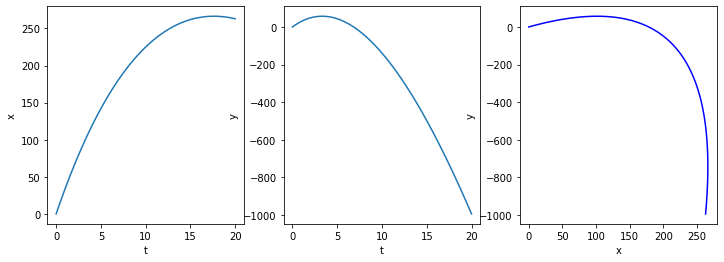

In [5]:

plt.figure(figsize = (12,4))
plt.subplot(131)
plt.plot(df.t, df.x)
plt.xlabel("t")
plt.ylabel("x")

plt.subplot(132)
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")

plt.subplot(133)
plt.plot(df.x, df.y,"b-")
plt.xlabel("x")
plt.ylabel("y")

In [6]:
from scipy import optimize

In [7]:
tiempo = optimize.newton(pos_y, 10, args=(params))

Text(0, 0.5, 'y')

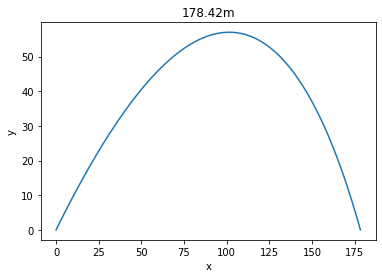

In [8]:
tiempo
tv = np.linspace(0, tiempo, 100)
plt.plot(pos_x(tv, *params),pos_y(tv, *params))
plt.title(f"{pos_x(tiempo, *params):.2f}m")
plt.xlabel("x")
plt.ylabel("y")

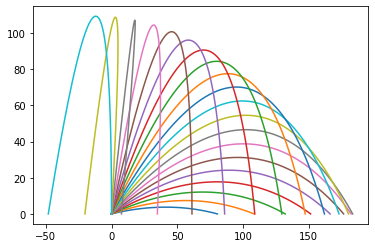

In [9]:
theta_ = np.linspace(10,90,20)
theta = np.deg2rad(theta_)

R = np.zeros(len(theta))
tv = np.zeros(len(theta))

for i,t in enumerate(theta):
  params = t, v0 , u, alpha,  g, b
  
  tiempo = optimize.newton(pos_y, 10, args=(params))
  tv[i] = tiempo
  R[i] = pos_x(tiempo,*params)

  t = np.linspace(0,tiempo,100)  
  plt.plot(pos_x(t, *params), pos_y(t, *params))

Text(0, 0.5, 'R')

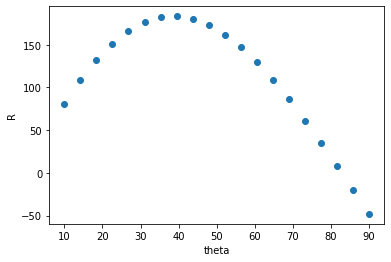

In [10]:
plt.plot(theta_, R,"o")
plt.xlabel("theta")
plt.ylabel("R")

In [11]:
# Deteminar el angulo para el cual el movimient se inveierte
# el maximo valor de la curva del alcance maximo, como funcion del angulo

In [12]:
H=np.polynomial.hermite.Hermite.fit(theta,R,5)

Text(0, 0.5, 'R')

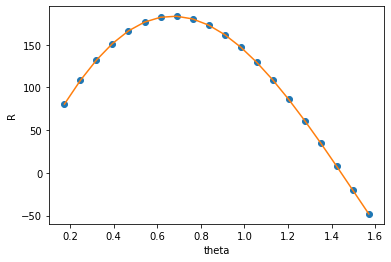

In [13]:
plt.plot(theta, R,"o")
plt.plot(theta,H(theta))
plt.xlabel("theta")
plt.ylabel("R")

#interpolacion de lagrange

Consideremos la funcion:

$$f(x)=\frac{1}{25+x^{2}}$$

En el intervalo [-1,1], definamos un conjunto de puntos n+1 equiespaciados en [-1,1]

1.Representar gráficamente la función junto al polinomio de interpolación de Lagrange $p_{n}(x)$, para $n=\left\lbrace{4,8,12,16,20}\right\rbrace$

2.  comprobar graficamente como aumenta el error con $n$

Emplee la cota del error:

$$f(x)-P(x)=\epsilon $$


In [14]:
def f(x):
  return 1/(1+25*x**2)

In [15]:
def x(n):
  x=np.linspace(-1,1,n+1)
  return x

In [16]:
p=lagrange(x(4),f(x(4)))

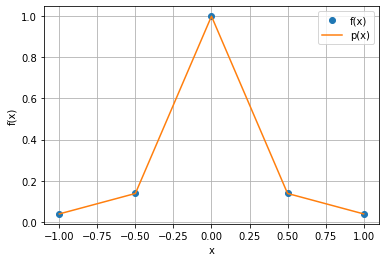

In [17]:
plt.figure()
plt.plot(x(4),f(x(4)),"o",label="f(x)")
plt.plot(x(4),p(x(4)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

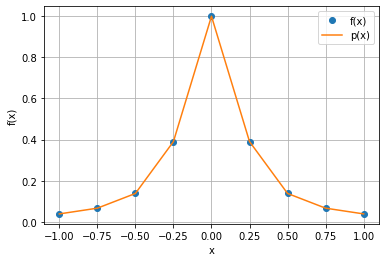

In [18]:
#para n=8
p=lagrange(x(8),f(x(8)))
plt.figure()
plt.plot(x(8),f(x(8)),"o",label="f(x)")
plt.plot(x(8),p(x(8)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

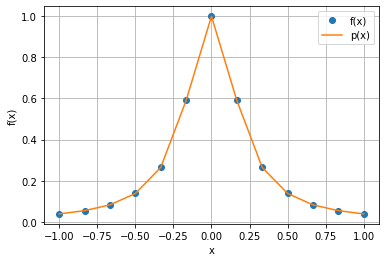

In [19]:
#para n=12
p=lagrange(x(12),f(x(12)))
plt.figure()
plt.plot(x(12),f(x(12)),"o",label="f(x)")
plt.plot(x(12),p(x(12)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

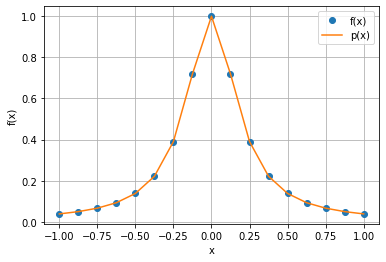

In [20]:
#para n=16
p=lagrange(x(16),f(x(16)))
plt.figure()
plt.plot(x(16),f(x(16)),"o",label="f(x)")
plt.plot(x(16),p(x(16)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

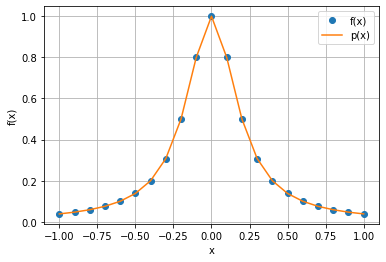

In [21]:
#para n=20
p=lagrange(x(20),f(x(20)))
plt.figure()
plt.plot(x(20),f(x(20)),"o",label="f(x)")
plt.plot(x(20),p(x(20)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Aumento del error respecto a n.

1. En [-1,1] usamos los nodos [-1,-0.33,0.33,1]

2. En consecuencia el cuarto polinomio de lagrange tiene la forma:

$$\frac{f^{5}\xi(x)}{5!}(x-x_0)(x-x_1)(x-x_2)(x-x_3)(x-x_4)$$

El maximo valor para $\xi(x)$ es cuando $x=0.33$, entonces $\xi(0.33)=7,70879$

Ahora necesitamos hallar el valor maximo en el intervalo para el polinomio, para $x=0.5$ que es $0,105825$.

Luego, el error maximo es:

$$\frac{f^{5}\xi(x)}{5!}\mid(x-x_0)(x-x_1)(x-x_2)(x-x_3)(x-x_4)\mid\leq\frac{1}{120}\times7,70879\times 0,105825=0,00679$$



-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


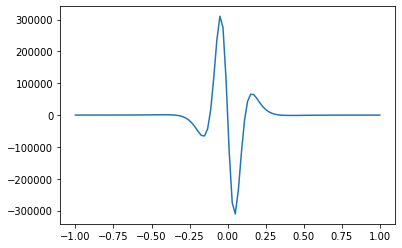

In [33]:
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

## Interpolacion de hermite

In [23]:
def f(x):
  return 1/(1+25*x**2)

In [24]:
def x(n):
  x=np.linspace(-1,1,n+1)
  return x

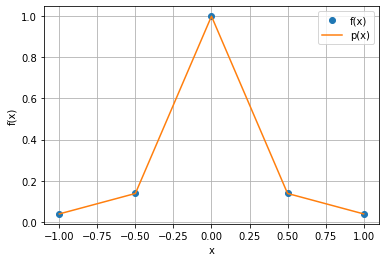

In [25]:
#para n=4
H=np.polynomial.hermite.Hermite.fit(x(4),f(x(4)),4)
plt.figure()
plt.plot(x(4),f(x(4)),"o",label="f(x)")
plt.plot(x(4),H(x(4)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

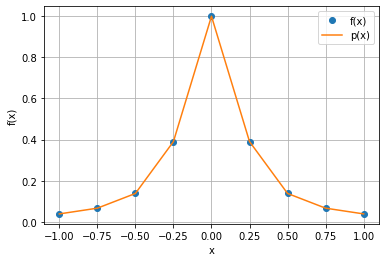

In [26]:
#para n=8
H=np.polynomial.hermite.Hermite.fit(x(8),f(x(8)),8)
plt.figure()
plt.plot(x(8),f(x(8)),"o",label="f(x)")
plt.plot(x(8),H(x(8)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

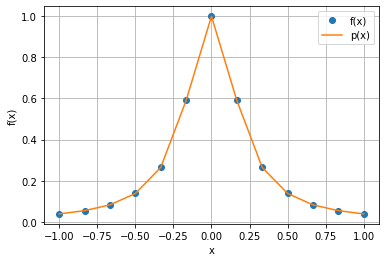

In [27]:
#para n=12
H=np.polynomial.hermite.Hermite.fit(x(12),f(x(12)),12)
plt.figure()
plt.plot(x(12),f(x(12)),"o",label="f(x)")
plt.plot(x(12),H(x(12)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

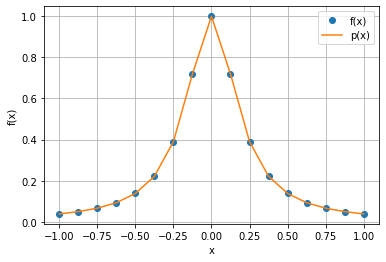

In [28]:
#para n=16
H=np.polynomial.hermite.Hermite.fit(x(16),f(x(16)),16)
plt.figure()
plt.plot(x(16),f(x(16)),"o",label="f(x)")
plt.plot(x(16),H(x(16)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


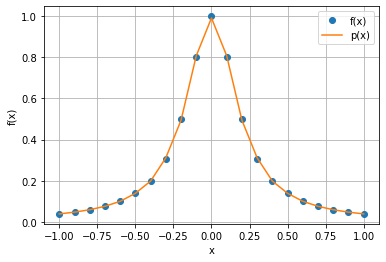

In [29]:
#para n=20
H=np.polynomial.hermite.Hermite.fit(x(20),f(x(20)),20)
plt.figure()
plt.plot(x(20),f(x(20)),"o",label="f(x)")
plt.plot(x(20),H(x(20)),label="p(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Spline cubico

In [35]:
im=plt.imread("/content/paloma.png")

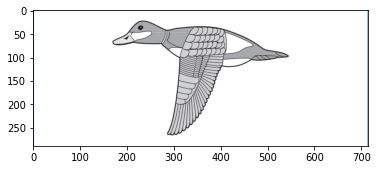

In [36]:
plt.imshow(im)

In [41]:
puntos=pd.DataFrame({"x":[172,187,209,229,254,272,284,304,333,378,423,469,495,536],
                     "y":[62.7,58,38,24,28,36,41,38,35,36,47,64,82,91]})

In [83]:
pol=lagrange(puntos.x,puntos.y)
cs=CubicSpline(puntos.x,puntos.y)

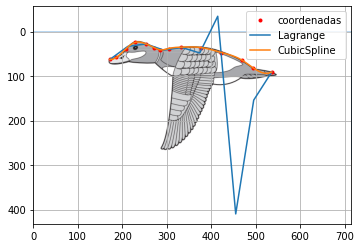

In [85]:
xp=np.linspace(puntos.x[0],puntos.x[13],10)
xc=np.linspace(puntos.x[0],puntos.x[13],50)
plt.figure()
plt.imshow(im)
plt.plot(puntos.x,puntos.y,"r.", label="coordenadas")
plt.plot(xp,pol(xp),label="Lagrange")
plt.plot(xc,cs(xc),label="CubicSpline")
plt.grid()
plt.legend()
plt.show()

In [88]:
cs(1)

array(-2867.01186515)

La interpolacion de lagrange presenta oscilaciones significativas por el grado del polinomio, entre mas puntos mas oscilaciones va a tener